In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from glob import glob
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Ah! But my bids-converted events files don't include the actual button responses and what the expected correct response would be. Gotta go back to the source data....

In [2]:
sub_list_mand = ['FLT01', 'FLT03', 'FLT05', 'FLT07', 'FLT08', 'FLT10']
sub_list_nman = ['FLT02', 'FLT04', 'FLT06', 'FLT09', 'FLT11', 'FLT12', 'FLT13']

In [3]:
raw_beh_dir = os.path.join('/Users/KRS228/',
                           'OneDrive - University of Pittsburgh/',
                           'CHA-IBR/01-ToneLearning')

In [4]:
sub_id_list = []
all_sub_list = []
for sx, sub_id in enumerate(sorted(sub_list_mand+sub_list_nman)):
    sub_id_list.append(sub_id)
    file_list = sorted(glob(raw_beh_dir+'/sub-%s*tone_learning*.csv'%sub_id))

    psy_list = []
    rx=1
    for fpath in file_list:
        psy_df = pd.read_csv(fpath, sep=',')
        print(fpath)
        print(len(psy_df))
        if len(psy_df)>40:
            psy_df['run'] = rx
            rx+=1
            psy_list.append(psy_df)
            all_df = pd.concat(psy_list)

    # just keep the critical data columns
    simple_df = all_df.loc[:,['key_resp.keys', 'corrAns', 
                              'key_resp.rt', 'key_resp.corr', 
                              'run']].dropna()
    simple_df['subject_id'] = sub_id

    # add a group column
    if sub_id in sub_list_mand:
        group_id = 'Mand'
    elif sub_id in sub_list_nman:
        group_id =  'NonM'
    simple_df['group'] = group_id

    # rename keypresses (are coded as [7,6,1,2] on the scanner)
    simple_df['corrAns'] = simple_df['corrAns'].astype(int)
    simple_df['key_resp.keys'] = simple_df['key_resp.keys'].astype(int)

    simple_df['key_resp.keys'].replace([7, 6, 1, 2], 
                                       [1, 2, 3, 4],
                                       inplace=True)
    simple_df['corrAns'].replace([7, 6, 1, 2], 
                                 [1, 2, 3, 4],
                                 inplace=True)

    # clean up non-responses
    simple_df.drop(simple_df[simple_df['key_resp.keys']=='None'].index, inplace=True)
    simple_df.drop(simple_df[simple_df['key_resp.keys']==8].index, inplace=True)
    simple_df.drop(simple_df[simple_df['corrAns']==0].index, inplace=True)
    
    # rename columns
    simple_df.rename(columns={'key_resp.keys': 'key_resp',
                              'key_resp.rt': 'RT',
                              'key_resp.corr': 'Correct'},
                    inplace=True)
    
    all_sub_list.append(simple_df)

# concatenate into a single dataframe    
all_sub_df = pd.concat(all_sub_list, ignore_index=True)

/Users/KRS228/OneDrive - University of Pittsburgh/CHA-IBR/01-ToneLearning/sub-FLT01_tone_learning_16-tone_jitter-fb_fmri_2022_Feb_14_1657.csv
2
/Users/KRS228/OneDrive - University of Pittsburgh/CHA-IBR/01-ToneLearning/sub-FLT01_tone_learning_16-tone_jitter-fb_fmri_2022_Feb_14_1710.csv
61
/Users/KRS228/OneDrive - University of Pittsburgh/CHA-IBR/01-ToneLearning/sub-FLT01_tone_learning_16-tone_jitter-fb_fmri_2022_Feb_14_1723.csv
66
/Users/KRS228/OneDrive - University of Pittsburgh/CHA-IBR/01-ToneLearning/sub-FLT01_tone_learning_16-tone_jitter-fb_fmri_2022_Feb_14_1735.csv
56
/Users/KRS228/OneDrive - University of Pittsburgh/CHA-IBR/01-ToneLearning/sub-FLT01_tone_learning_16-tone_jitter-fb_fmri_2022_Feb_14_1745.csv
66
/Users/KRS228/OneDrive - University of Pittsburgh/CHA-IBR/01-ToneLearning/sub-FLT02_tone_learning_16-tone_jitter-fb_fmri_2022_Mar_28_1901.csv
66
/Users/KRS228/OneDrive - University of Pittsburgh/CHA-IBR/01-ToneLearning/sub-FLT02_tone_learning_16-tone_jitter-fb_fmri_2022_Mar_2

/Users/KRS228/OneDrive - University of Pittsburgh/CHA-IBR/01-ToneLearning/sub-FLT10_tone_learning_16-tone_jitter-fb_fmri_2022_Aug_02_0903.csv
66
/Users/KRS228/OneDrive - University of Pittsburgh/CHA-IBR/01-ToneLearning/sub-FLT10_tone_learning_16-tone_jitter-fb_fmri_2022_Aug_02_0911.csv
0
/Users/KRS228/OneDrive - University of Pittsburgh/CHA-IBR/01-ToneLearning/sub-FLT10_tone_learning_16-tone_jitter-fb_fmri_2022_Aug_02_0913.csv
66
/Users/KRS228/OneDrive - University of Pittsburgh/CHA-IBR/01-ToneLearning/sub-FLT10_tone_learning_16-tone_jitter-fb_fmri_2022_Aug_02_0921.csv
66
/Users/KRS228/OneDrive - University of Pittsburgh/CHA-IBR/01-ToneLearning/sub-FLT10_tone_learning_16-tone_jitter-fb_fmri_2022_Aug_02_0930.csv
66
/Users/KRS228/OneDrive - University of Pittsburgh/CHA-IBR/01-ToneLearning/sub-FLT10_tone_learning_16-tone_jitter-fb_fmri_2022_Aug_02_0940.csv
66
/Users/KRS228/OneDrive - University of Pittsburgh/CHA-IBR/01-ToneLearning/sub-FLT10_tone_learning_16-tone_jitter-fb_fmri_2022_Aug_0

In [5]:
all_sub_df

,key_resp,corrAns,RT,Correct,run,subject_id,group
0,1,4,0.127454,0.0,1,FLT01,Mand
1,2,3,0.881855,0.0,1,FLT01,Mand
2,2,2,1.240418,1.0,1,FLT01,Mand
3,4,4,0.891033,1.0,1,FLT01,Mand
4,3,3,0.906777,1.0,1,FLT01,Mand
...,...,...,...,...,...,...,...
3377,3,3,0.817656,1.0,6,FLT13,NonM
3378,4,4,0.863376,1.0,6,FLT13,NonM
3379,4,4,0.867938,1.0,6,FLT13,NonM
3380,1,1,1.471127,1.0,6,FLT13,NonM


In [6]:
all_sub_df.to_csv('sub-all_task-tonelearning_trials.csv')

In [7]:
pwd

'/Users/KRS228/OneDrive - University of Pittsburgh/software/tone_7T/auditory_category_learning'

In [80]:
avg_sub_df = all_sub_df.groupby(by=['group','subject_id', 'run'], as_index=False).mean()

In [81]:
avg_sub_df

,group,subject_id,run,key_resp,corrAns,RT,Correct
0,Mand,FLT01,1,2.400000,2.488889,0.910194,0.955556
1,Mand,FLT01,2,2.500000,2.500000,0.756795,1.000000
2,Mand,FLT01,3,2.441860,2.465116,0.822100,0.976744
3,Mand,FLT01,4,2.500000,2.500000,0.818175,1.000000
4,Mand,FLT03,1,2.479167,2.500000,1.079321,0.979167
...,...,...,...,...,...,...,...
71,NonM,FLT13,2,2.020833,2.500000,0.909817,0.437500
72,NonM,FLT13,3,2.191489,2.531915,0.976238,0.425532
73,NonM,FLT13,4,2.270833,2.500000,1.144523,0.645833
74,NonM,FLT13,5,2.458333,2.500000,1.116441,0.895833


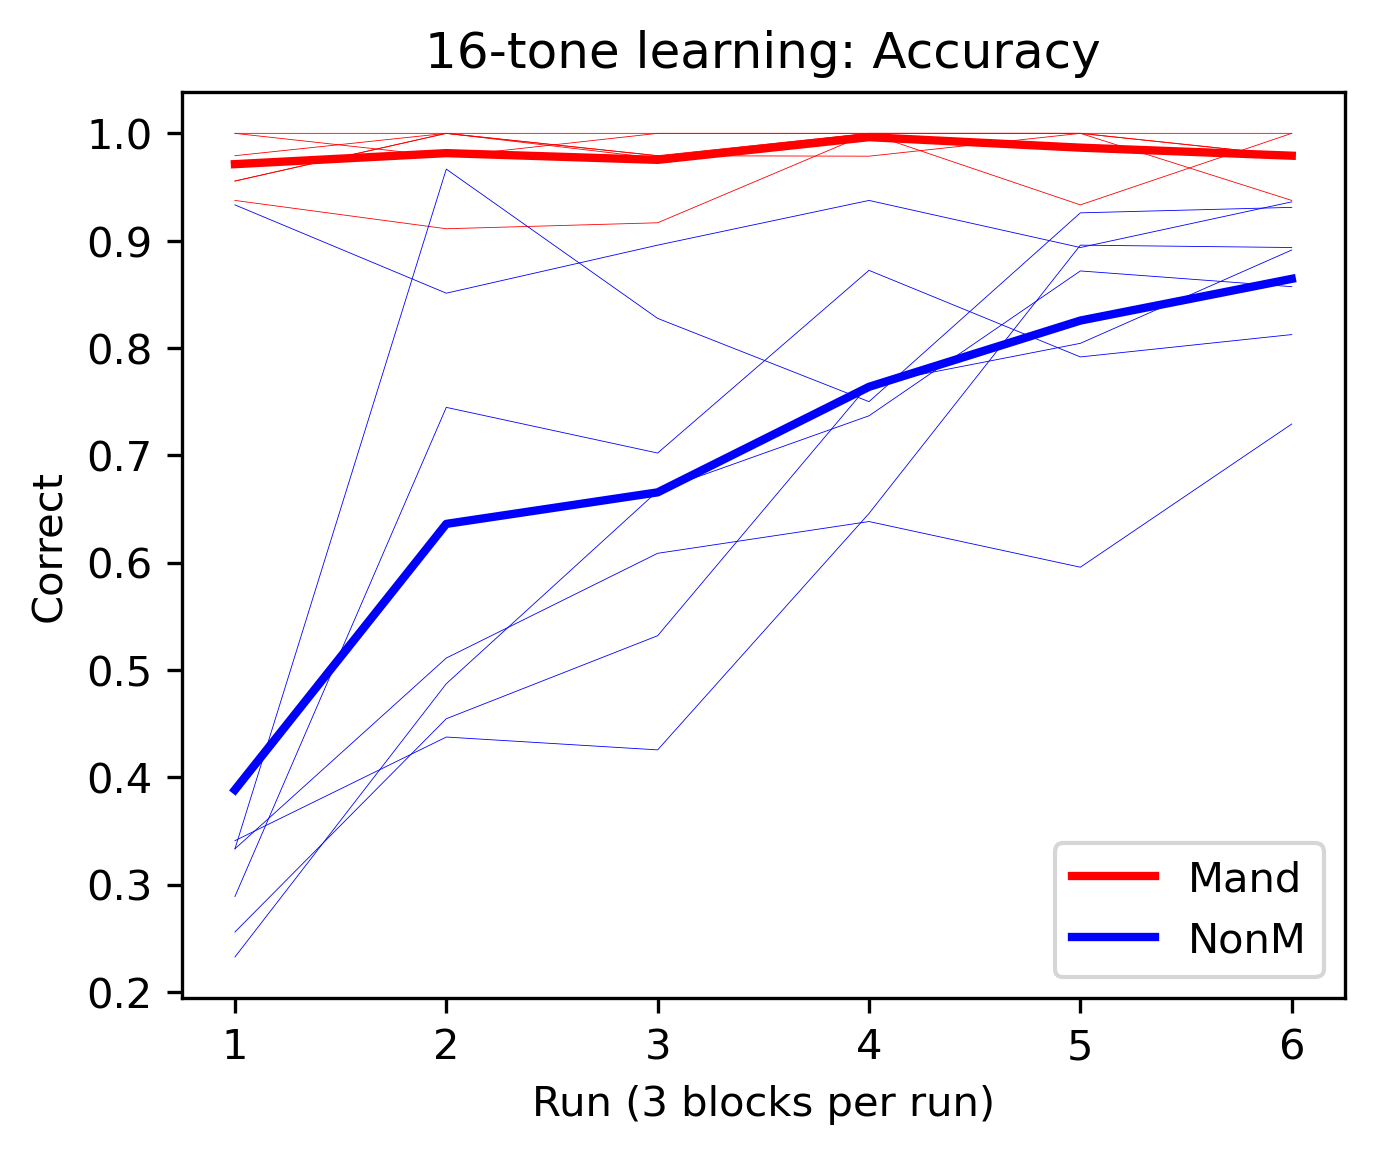

In [82]:
f, ax = plt.subplots(1,1, dpi=300, figsize=(5,4))


sns.lineplot(data=avg_sub_df, 
             x='run', 
             y='Correct', 
             hue='group',
             palette=['r','b'],
             errorbar=None,
             lw=2,
            )

sns.lineplot(data=avg_sub_df, 
             x='run', 
             y='Correct', 
             hue='group', 
             units='subject_id', 
             estimator=None,
             palette=['r','b'],
             lw=.2
            )

# add niceties
plt.xlabel("Run (3 blocks per run)");
plt.title('16-tone learning: Accuracy')
ax.legend_.remove()
ax.legend(['Mand','NonM'])
#plt.legend(loc='lower right')
#plt.xlim([1,11])
#plt.ylim([0.,1.0])

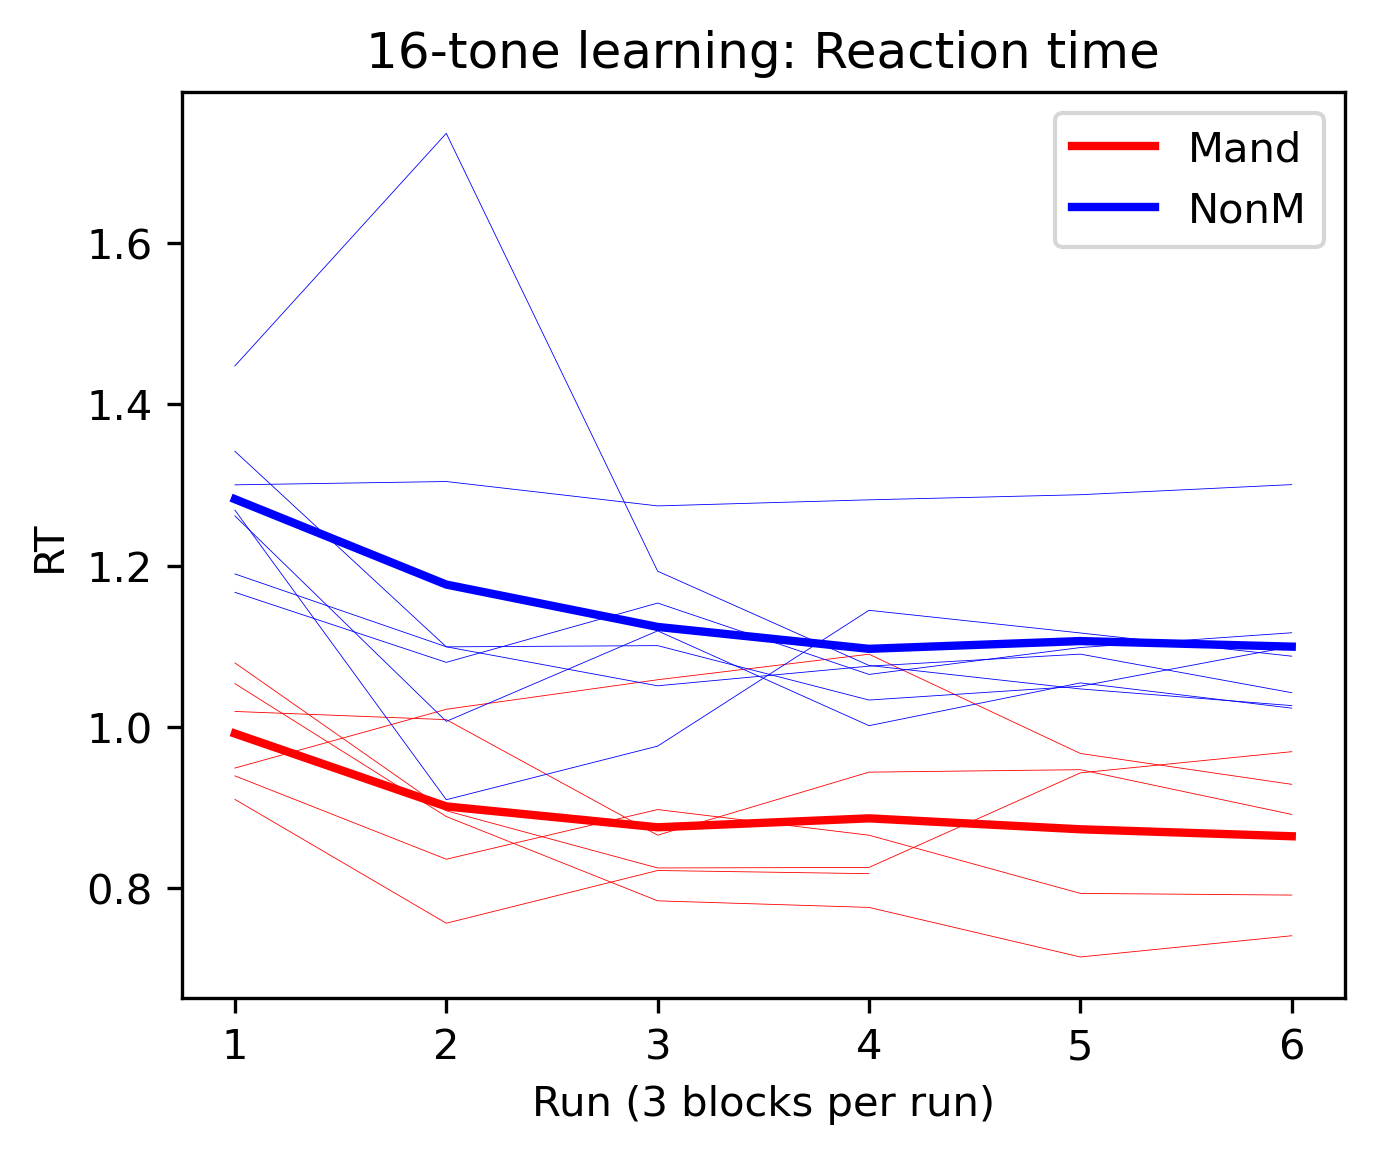

In [83]:
f, ax = plt.subplots(1,1, dpi=300, figsize=(5,4))


sns.lineplot(data=avg_sub_df, 
             x='run', 
             y='RT', 
             hue='group',
             palette=['r','b'],
             errorbar=None,
             lw=2,
            )

sns.lineplot(data=avg_sub_df, 
             x='run', 
             y='RT', 
             hue='group', 
             units='subject_id', 
             estimator=None,
             palette=['r','b'],
             lw=.2
            )

# add niceties
plt.xlabel("Run (3 blocks per run)");
plt.title('16-tone learning: Reaction time')
ax.legend_.remove()
ax.legend(['Mand','NonM'])
#plt.legend(loc='lower right')
#plt.xlim([1,11])
#plt.ylim([0.,1.0])

### Subject-specific confusion matrices

In [84]:
len(all_sub_list)

13

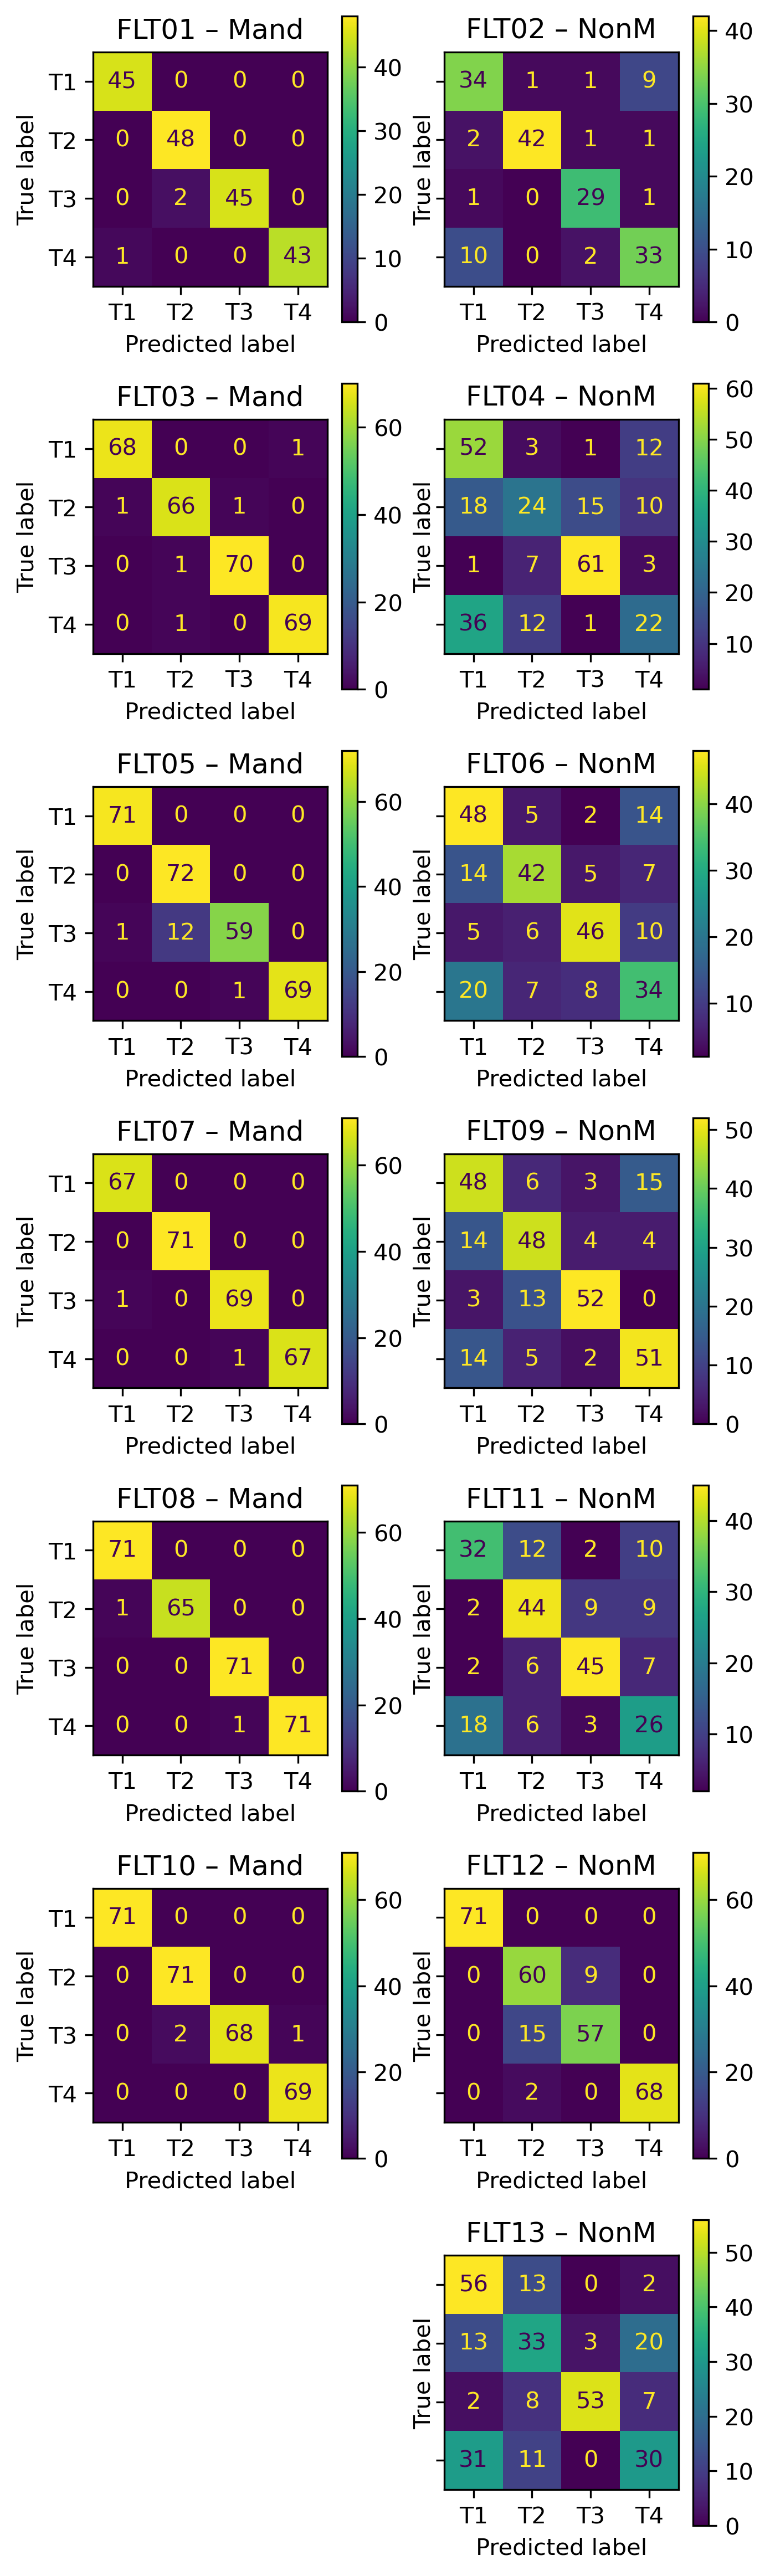

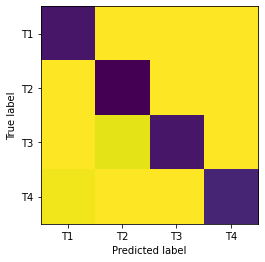

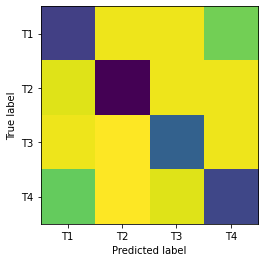

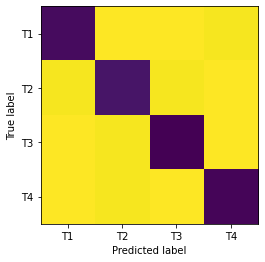

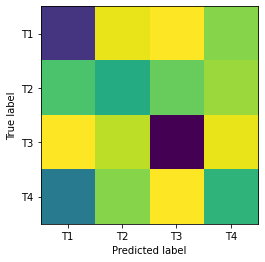

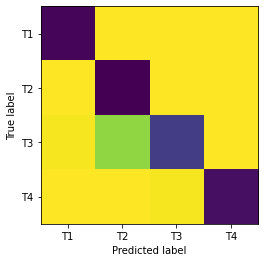

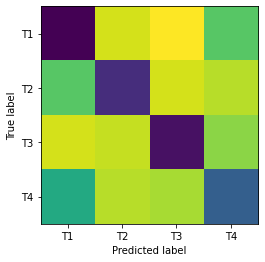

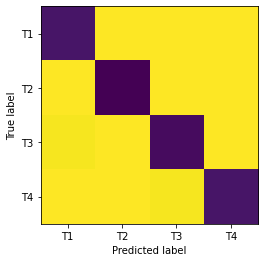

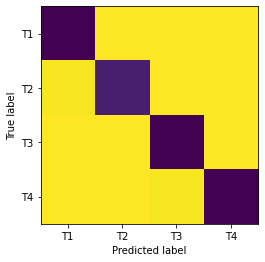

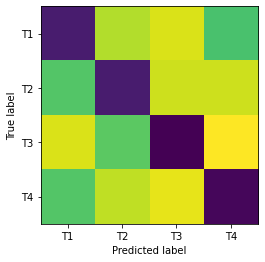

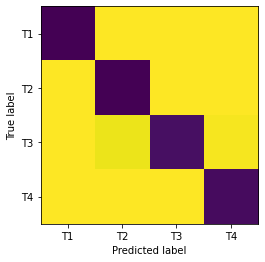

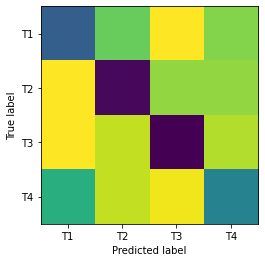

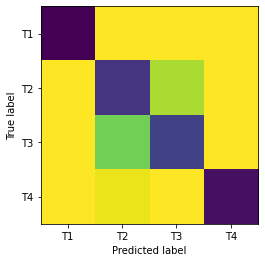

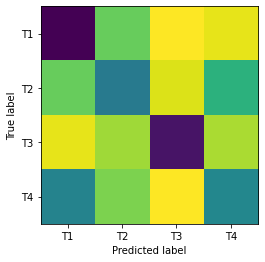

In [97]:
fig, axes = plt.subplots(7,2, figsize=(5,20), dpi=300, sharey='row')
mand_i = 0
nonm_i = 0
for sx, sub_df in enumerate(all_sub_list):
    sub_id = sub_id_list[sx]
    y_correct = np.array(sub_df['corrAns'])
    y_response = np.array(sub_df['key_resp'])   

    cm = confusion_matrix(y_correct, y_response)

    disp = ConfusionMatrixDisplay.from_predictions(y_correct, y_response, 
                                                   display_labels=['T1', 'T2', 'T3', 'T4'],
                                                   cmap='Blues', 
                                                   colorbar=False, 
                                                   include_values=False)
    if sub_id in sub_list_mand:
        disp.plot(ax=axes[mand_i,0])
        mand_i += 1
        group_id = 'Mand'
    elif sub_id in sub_list_nman:
        disp.plot(ax=axes[nonm_i,1])
        nonm_i += 1
        group_id = 'NonM'
    disp.ax_.set_title('%s – %s'%(sub_id, group_id));
fig.delaxes(axes[6][0])